# 1. 거꾸로 뒤집은 시퀀스로 LSTM 학습

In [1]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential

In [2]:
max_features = 10000 # 특성 사용 개수
maxlen = 500         # 사용할 텍스트 길이 (가장 빈도 높은 10000개의 단어만 사용)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) # 데이터 로드

17464789/17464789 [==============================] - 2s 0us/step


In [3]:
# 시퀀스 뒤집기
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

In [4]:
# 패딩
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [5]:
# 모델 설계
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1300641 (4.96 MB)
Trainable params: 1300641 (4.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# 학습
hist = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 16s 81ms/step - loss: 0.6103 - acc: 0.6542 - val_loss: 0.4087 - val_acc: 0.8326
Epoch 2/10
157/157 [==============================] - 10s 61ms/step - loss: 0.3925 - acc: 0.8411 - val_loss: 0.3450 - val_acc: 0.8640
Epoch 3/10
157/157 [==============================] - 8s 53ms/step - loss: 0.3123 - acc: 0.8805 - val_loss: 0.3455 - val_acc: 0.8796
Epoch 4/10
157/157 [==============================] - 7s 43ms/step - loss: 0.2756 - acc: 0.8990 - val_loss: 0.3280 - val_acc: 0.8780
Epoch 5/10
157/157 [==============================] - 6s 39ms/step - loss: 0.2373 - acc: 0.9126 - val_loss: 0.3332 - val_acc: 0.8804
Epoch 6/10
157/157 [==============================] - 6s 36ms/step - loss: 0.2128 - acc: 0.9236 - val_loss: 0.3635 - val_acc: 0.8652
Epoch 7/10
157/157 [==============================] - 5s 32ms/step - loss: 0.1989 - acc: 0.9289 - val_loss: 0.3495 - val_acc: 0.8740
Epoch 8/10
157/157 [==============================] - 5s 32ms/step 

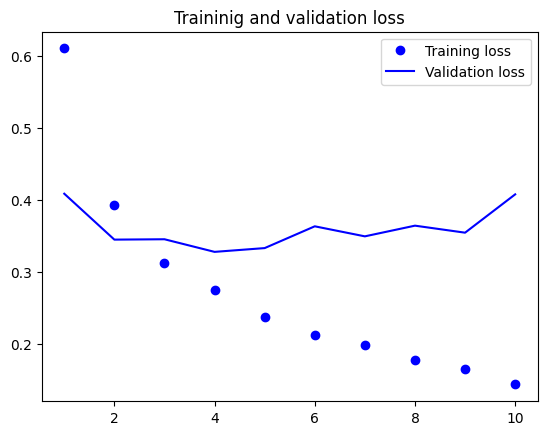

In [7]:
import matplotlib.pyplot as plt

history = hist.history
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Traininig and validation loss')
plt.legend()
plt.show()

- 텍스트 데이터에 대해 시퀀스를 거꾸로 뒤집어 LSTM을 학습시킨 결과와 시퀀스를 거꾸로 뒤집지 않고 LSTM을 학습시킨 결과의 Validation accuracy와 Validation loss가 비슷하다. 즉, 텍스트 데이터셋의 순서를 뒤집어 처리하는 것이 시간 순서대로 처리하는 것과 거의 동일하게 잘 작동한다.
- 이러한 결과는 언어를 이해하는 데 **단어의 순서가 중요하지만 결정적이지 않다**는 가정을 뒷받침한다.
- 하지만 순서가 중요한 경우, 예를 들어 온도 예측 문제의 경우에는 시퀀스를 뒤집는다면 뒤집지 않은 경우보다 성능이 더 좋지 않을 것이다. 예를 들어 기본적인 GRU layer는 과거보다 최근 내용을 잘 기억한다. 최근에 가까운 데이터일수록 오래된 데이터보다 예측에 유용할 것인데 이를 뒤집어 버리면 기본적인 GRU layer보다 성능이 더 좋지 않을 것이다.